### INSURANCE CUSTOMER MARKET SEGMENTATION PROJECT
**Business Problem and Context**

Banks and insurance firms need to understand customer behavior to offer the right products and reduce churn.
This project uses machine learning segmentation to group customers by their spending, payment, and credit-usage patterns.

The goal is to help the business:

	•	Personalize offers like savings plans, loans, and investment products.
	•	Improve marketing efficiency and customer retention.
	•	Identify high-value and high-risk clients.

- Using clustering algorithms such as K-Means and GMM, customers are segmented into behavior-based groups.
- A Streamlit app allows analysts to upload data, view segment insights, and generate tailored recommendations in real time.

###1. DATASET LOADING AND DESCRIPTION

- For this project, for privacy purposes, I will be using insurance customer data sourced from Kaggle

Importing the Necessary Libraries

In [1]:
#Import all the necessary libraries to perform end-to end market segmentation Machine Learning Project on customer data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree

import warnings

In [2]:
#read csv file "Customer Data.csv"
df = pd.read_csv("Customer Data.csv")
df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
#SHAPE OF THE DF
df.shape

(8950, 18)

The dataset has 8950 records with 18 variables

VARIABLES ANALYSIS

In [4]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
#check data types of the columns
df.dtypes


,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


**Dataset Overview**

The dataset contains customer-level information describing credit card usage behavior over six months. Each feature represents a specific aspect of financial activity used for segmentation.

- **CUST_ID** – Unique customer identifier  
- **BALANCE** – Average monthly balance amount  
- **BALANCE_FREQUENCY** – Frequency of balance updates  
- **PURCHASES** – Total value of all purchases  
- **ONEOFF_PURCHASES** – Value of one-time purchases  
- **INSTALLMENTS_PURCHASES** – Value of installment purchases  
- **CASH_ADVANCE** – Total amount withdrawn as cash advance  
- **PURCHASES_FREQUENCY** – Frequency of purchase transactions  
- **ONEOFF_PURCHASES_FREQUENCY** – Frequency of one-time purchases  
- **PURCHASES_INSTALLMENTS_FREQUENCY** – Frequency of installment-based purchases  
- **CASH_ADVANCE_FREQUENCY** – Frequency of cash advances  
- **CASH_ADVANCE_TRX** – Number of cash advance transactions  
- **PURCHASES_TRX** – Number of purchase transactions  
- **CREDIT_LIMIT** – Credit limit assigned to the customer  
- **PAYMENTS** – Total payments made by the customer  
- **MINIMUM_PAYMENTS** – Minimum payment amounts made  
- **PRC_FULL_PAYMENT** – Percentage of full balance payments  
- **TENURE** – Number of months the account has been active  

In [6]:
#Statistical Summary of the Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


The summary shows that most customers maintain moderate average balances (~1,564) but with a high spread, indicating a mix of low and high spenders. Purchase behavior varies widely, with mean purchases around 1,003 but a large standard deviation, suggesting uneven spending habits. Many customers rarely use cash advances (median = 0), though a few high users push the mean up. Purchase frequencies center around 0.5, implying most customers make purchases about half the time during the observation period. Credit limits average around 4,494, and most customers make partial payments, as seen from the low PRC_FULL_PAYMENT mean (0.15). Minimum payments have extreme variability, showing different repayment capacities. Lastly, tenure averages about 11.5 months, meaning most customers are long-standing and active for nearly the entire recorded period.

Checking for missing values

In [7]:
#check for missing values
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


- The minumum payments records have 313 missing values, which 3.5% of the total payments records. To handle this we will have to impute the data, but first lets check the distribution of this variable

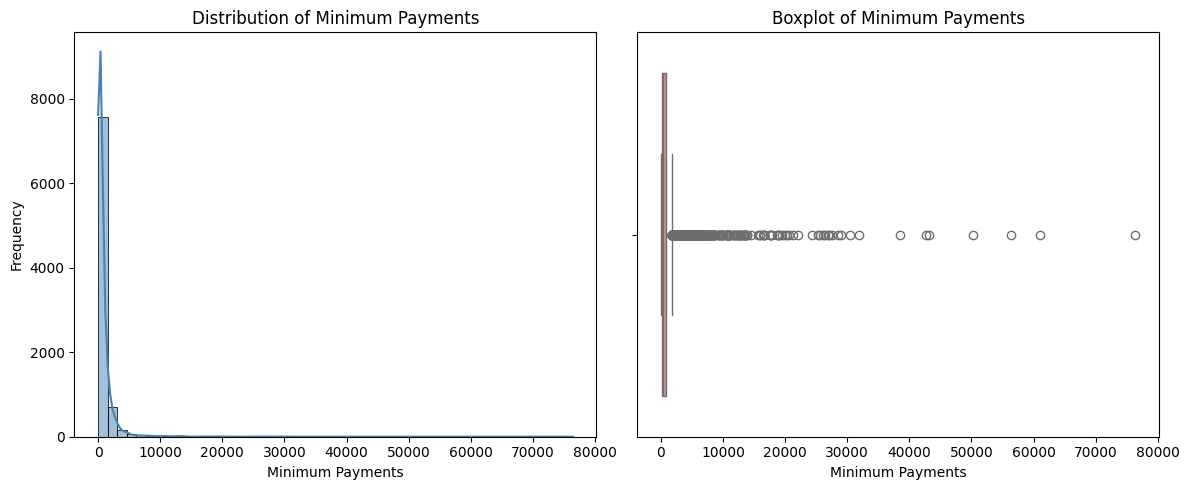

In [8]:
#Plot the minimum_payments distribution
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['MINIMUM_PAYMENTS'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Minimum Payments')
plt.xlabel('Minimum Payments')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['MINIMUM_PAYMENTS'], color='lightcoral')
plt.title('Boxplot of Minimum Payments')
plt.xlabel('Minimum Payments')

plt.tight_layout()
plt.show()


The minimum_payments distribution shows a rightly skewed dataset, so for handling missing values, we will be using the median value to impute

In [9]:
#impute Minimum_Payments with median and Credit_Limit with mean
# Proper and future-proof way to impute missing values

df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

# Check results
df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isna().sum()



,0
MINIMUM_PAYMENTS,0
CREDIT_LIMIT,0


Great, now all out variables have no missing values. Next I will drop the Customer ID column because it has no impact on the model, since customer ID is generated just for unique transaction identification

In [10]:
#drop Customer ID column
df.drop('CUST_ID', axis=1, inplace=True)

In [11]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


KERNEL DENSITY PLOT for remaining variables to see the distribution of the variables

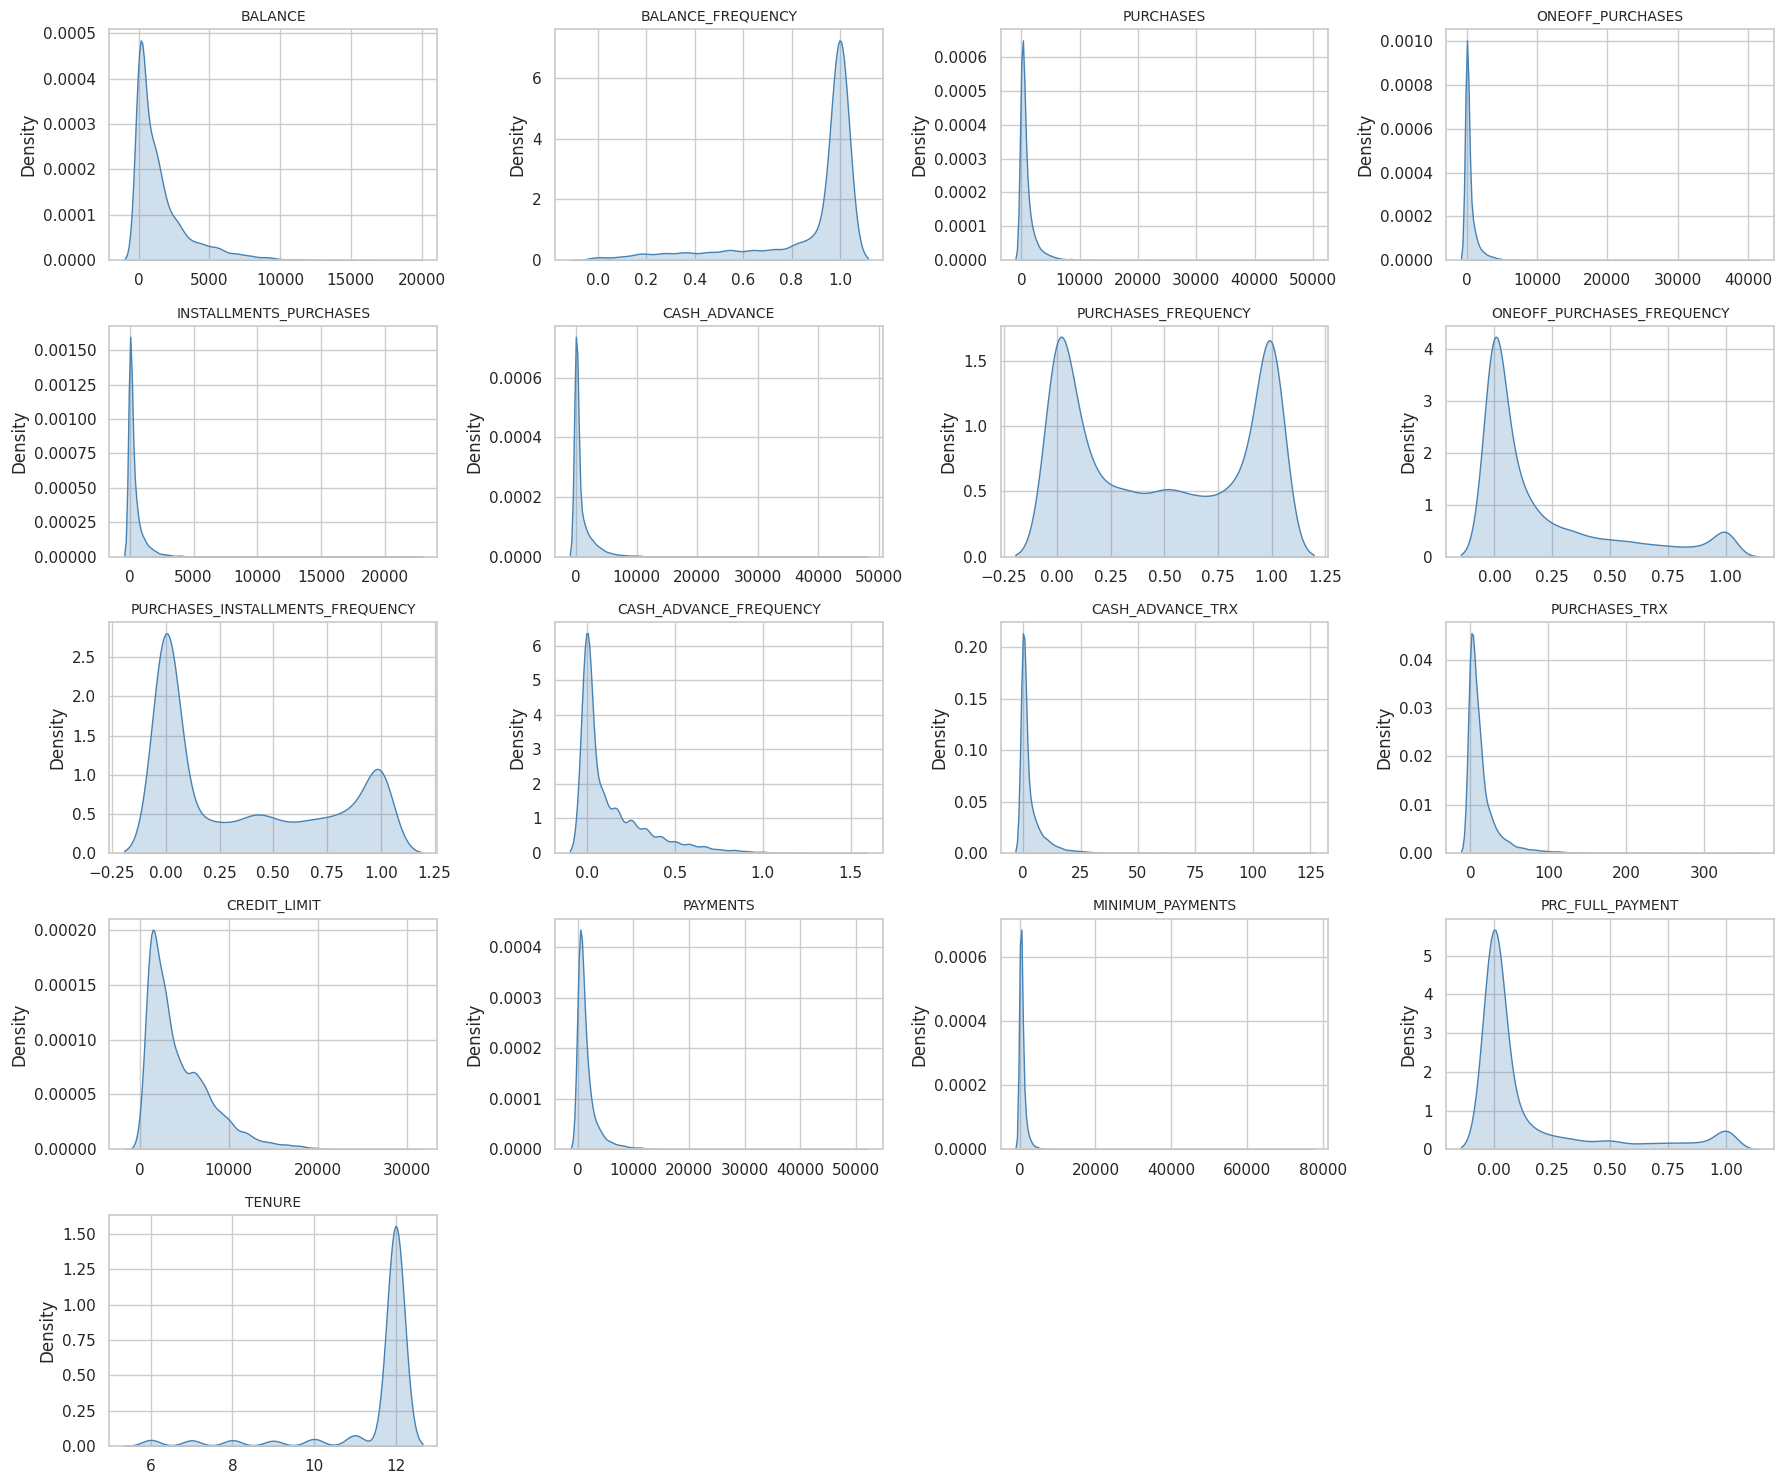

In [12]:
import math

# Determine layout
cols = 4
rows = math.ceil(len(df.columns) / cols)

plt.figure(figsize=(18, rows * 3))
sns.set(style="whitegrid")

for i, col in enumerate(df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(df[col], color="steelblue", fill=True)
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

We can see that none of the variables are normally distributed, so we will confirm this with a distplot to see the distribtion and histogram combination

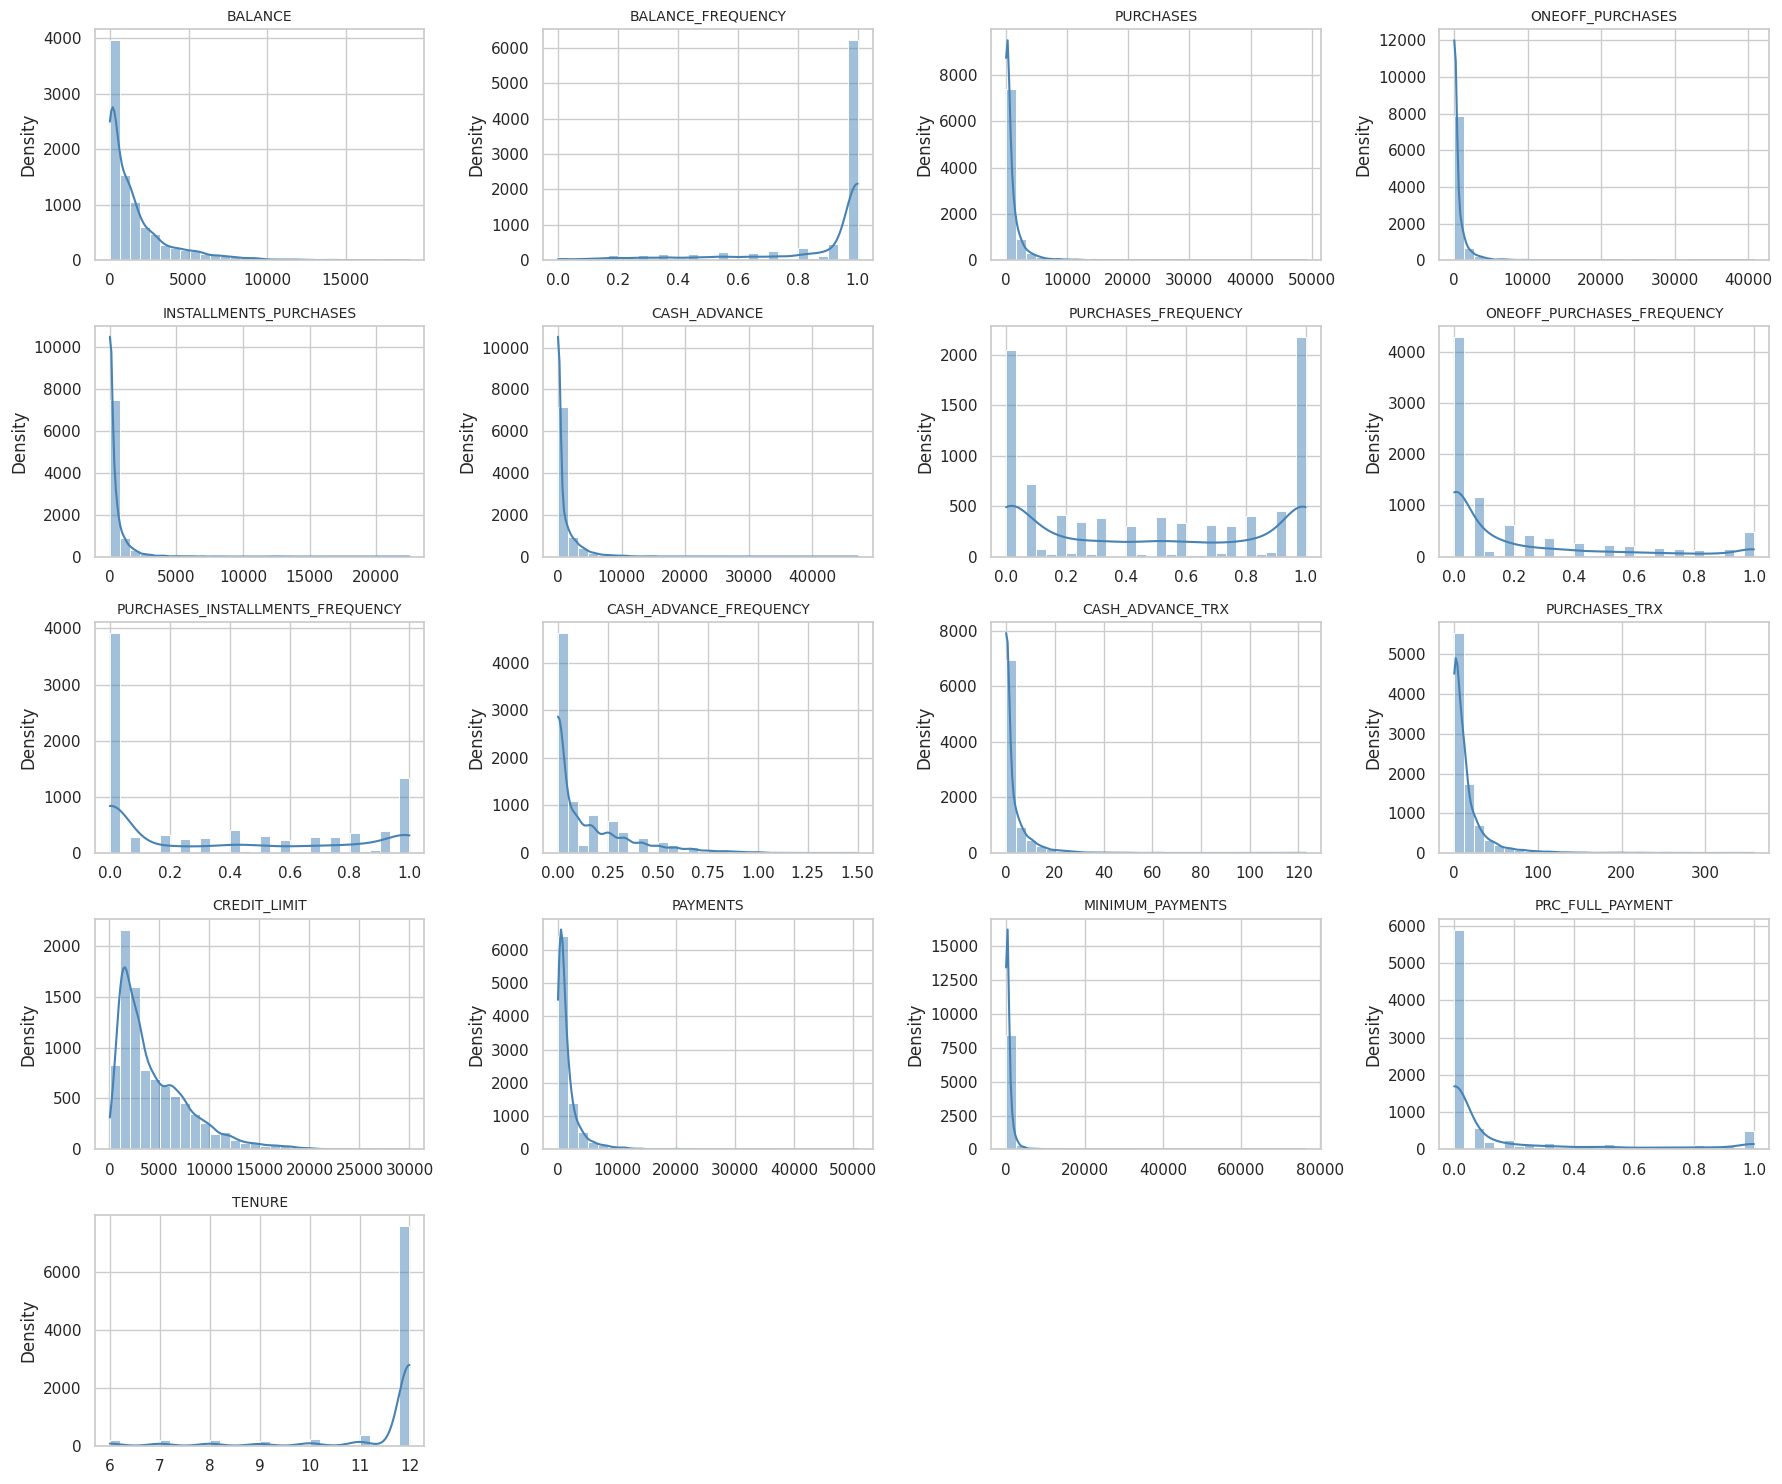

In [13]:
import math

cols = 4
rows = math.ceil(len(df.columns) / cols)

plt.figure(figsize=(18, rows * 3))
sns.set(style="whitegrid")

for i, col in enumerate(df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, color='steelblue', bins=30)
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

The data shows that majority of the variables are rightly-skewed and for model training, scaling the data will be important to ensure that the high values do not dominate the data

Now that we have seen the distribution of the data, we have to then see how these features relate to each other. Therefore, we will plot a heatmap

**Correlation Heatmap **

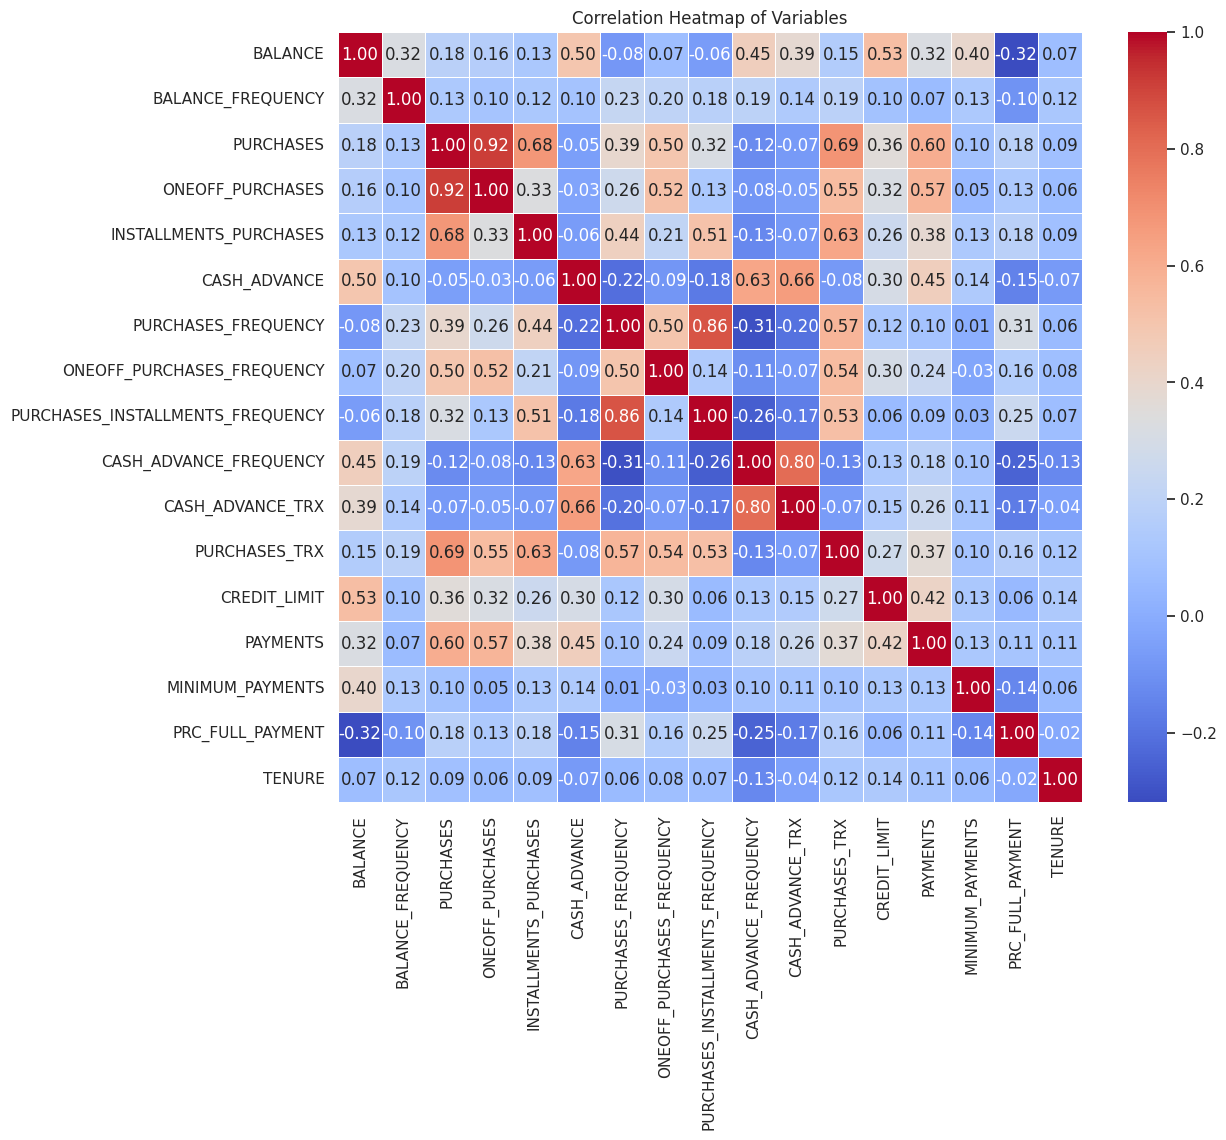

In [14]:
#plot a correlation heatmap of the variables
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

- PURCHASES, ONEOFF_PURCHASES, and PURCHASES_TRX show strong positive correlations (≥ 0.6–0.9), meaning customers who make more purchases also tend to make more one-off transactions and have higher transaction counts.

- CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, and CASH_ADVANCE_TRX are moderately correlated (0.6–0.7), suggesting a consistent pattern of frequent cash advances among a subset of customers.
- BALANCE has a moderate correlation with CASH_ADVANCE (0.50) and CREDIT_LIMIT (0.53), indicating that customers with higher credit limits or cash advance activity maintain higher balances.
- PRC_FULL_PAYMENT is negatively correlated with BALANCE (−0.32), implying that customers who often pay their balance in full typically maintain lower outstanding balances.
- TENURE and BALANCE_FREQUENCY have weak correlations with other variables, suggesting they provide independent information.

**FEATURE SCALING**
In order to train a model with no bias, we will scale the features using a standard scaler

In [15]:
#scale the features using a standard scaler and fit it to the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

**HANDLING DIMENTIONALITY**

-Our dataset has variables that are redundant, therefore, for this final code, we will apply PCA to reduce the dimentionality of the data to make it more robust. **Why Apply PCA**

-PCA (Principal Component Analysis) is applied to reduce dimensionality and remove redundancy among correlated variables. It helps capture most of the dataset’s variance in fewer components, making the data easier to visualize and improving clustering performance by focusing on the most informative patterns while minimizing noise.

In [24]:
# Apply PCA to the scaled data
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-1.683626,-1.072301
1,-1.134174,2.509102
2,0.969367,-0.383581
3,-0.888250,0.004621
4,-1.600012,-0.683861
...,...,...
8945,-0.362483,-2.013400
8946,-0.580728,-1.675632
8947,-0.928898,-1.808017
8948,-2.337781,-0.653607


###K-MEANS CLUSTERING

Finding number of K-clusters using elbow method

In [17]:
!pip install yellowbrick -q

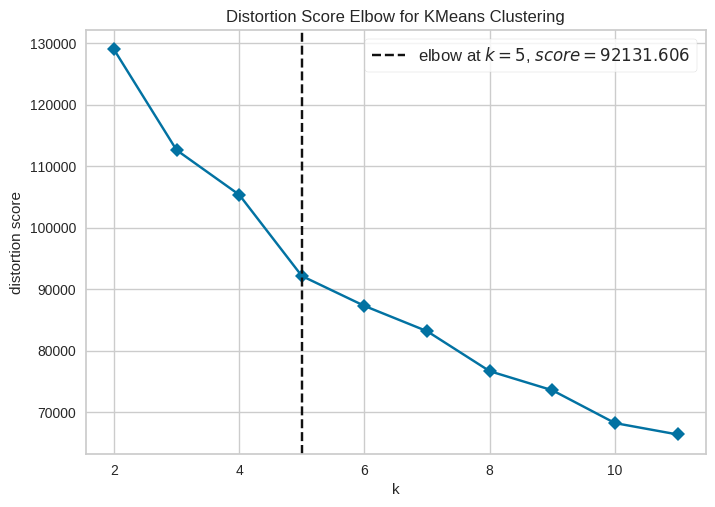

Suggested K (distortion): 5


In [25]:
# ==========================================
# Elbow Method with Yellowbrick (on scaled data)
# ==========================================
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X = df_scaled  # use PCA scores instead: X = pca_df.values

# 1) Distortion elbow
model = KMeans(n_init="auto", random_state=42)
viz = KElbowVisualizer(model, k=(2, 12), metric="distortion", timings=False)
viz.fit(X)
viz.show();

print("Suggested K (distortion):", viz.elbow_value_)

Using the Yellow bricks package, we will select 5 clusters for this dataset


Silhouette score (K=5): 0.193
Cluster counts:
 0    3910
1    1385
2      85
3    2415
4    1155
Name: count, dtype: int64


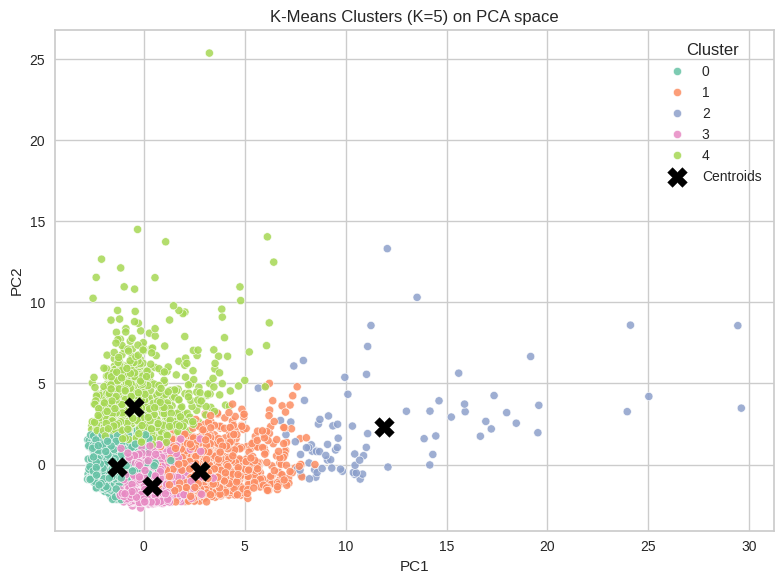

In [35]:
# =========================
# K-Means (K=5)
# =========================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Train
kmeans_model = KMeans(n_clusters=5, n_init=10, random_state=42)
labels = kmeans_model.fit_predict(df_scaled)

# 2) Attach labels to PCA scores
pca_df_kmeans = pca_df.copy()
pca_df_kmeans["cluster"] = labels

# 3) Project cluster centroids into PC space for plotting
pc_centers = pca.transform(kmeans_model.cluster_centers_)

# 4) Silhouette
print("Silhouette score (K=5):", round(silhouette_score(df_scaled, labels), 3))
print("Cluster counts:\n", pd.Series(labels).value_counts().sort_index())

# 5) Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df_kmeans, x="PC1", y="PC2",
    hue="cluster", palette="Set2", s=35, alpha=0.85
)
plt.scatter(pc_centers[:,0], pc_centers[:,1], marker="X", s=200, c="black", label="Centroids")
plt.title("K-Means Clusters (K=5) on PCA space")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

The 5 clusters have been formed and the customers in each cluster represent that those customers have similar characteristics within that cluster. K=5 have a more balance segmentation of the dataset.

In [36]:
# ==========================================
# Cluster Centers (Inverse Transformed)
# ==========================================

# 1) Get centers in scaled space
cluster_centers = pd.DataFrame(
    data=kmeans_model.cluster_centers_,
    columns=df.columns
)

# 2) Inverse transform to original scale
cluster_centers = scaler.inverse_transform(cluster_centers)

# 3) Convert back to DataFrame for readability
cluster_centers = pd.DataFrame(
    data=cluster_centers,
    columns=df.columns
)

# 4) Display centers
cluster_centers.round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1049.16,0.80,278.76,225.55,53.40,616.75,0.16,0.10,0.07,0.12,2.19,2.95,3343.06,1006.11,556.96,0.07,11.46
1,1903.44,0.98,2924.91,1989.96,935.38,360.87,0.92,0.73,0.59,0.06,1.17,43.63,6987.35,2789.84,832.79,0.27,11.88
2,4516.37,0.98,15897.09,10780.89,5116.20,1039.84,0.93,0.77,0.78,0.08,2.86,130.44,12451.76,15564.00,3344.43,0.40,11.96
3,645.90,0.90,798.38,167.37,631.51,178.02,0.86,0.08,0.79,0.04,0.71,16.65,3198.84,935.90,670.28,0.27,11.46
4,4600.50,0.97,485.41,299.00,186.49,4608.70,0.28,0.13,0.18,0.49,14.63,7.31,7522.22,3573.44,2013.13,0.04,11.37


We will now also add the cluster labels to each point in the data after training and fitting the model

In [37]:
# After fitting kmeans_model on df_scaled
labels = pd.Series(kmeans_model.labels_, index=df.index, name="Cluster").astype(int)

# Attach to original df (or use pca_df if you prefer)
cluster_df = pd.concat([df.copy(), labels], axis=1)

# Quick checks
print(cluster_df["Cluster"].value_counts().sort_index())
cluster_df.head()

Cluster
0    3910
1    1385
2      85
3    2415
4    1155
Name: count, dtype: int64


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


We will now do a quick check of the cluster distrubution in form of bar graph

/tmp/ipython-input-4207268265.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=cluster_df, palette='Set2')


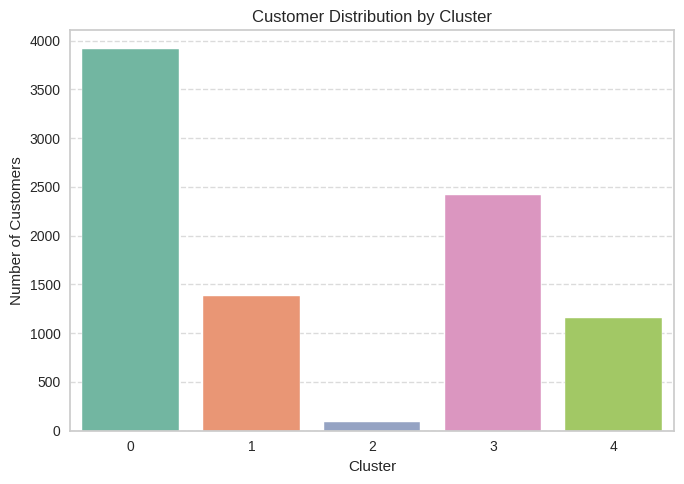

In [39]:
# ==========================================
# Cluster Distribution Bar Plot
# ==========================================
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(x='Cluster', data=cluster_df, palette='Set2')
plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 **Cluster 2 Insight**

Cluster 2 contains very few customers, indicating an outlier group. These customers likely show extreme or uncommon financial behavior,such as very high balances, irregular payments, or minimal activity. They should be reviewed separately, as they may represent either high-risk or high-value clients rather than a typical customer segment.

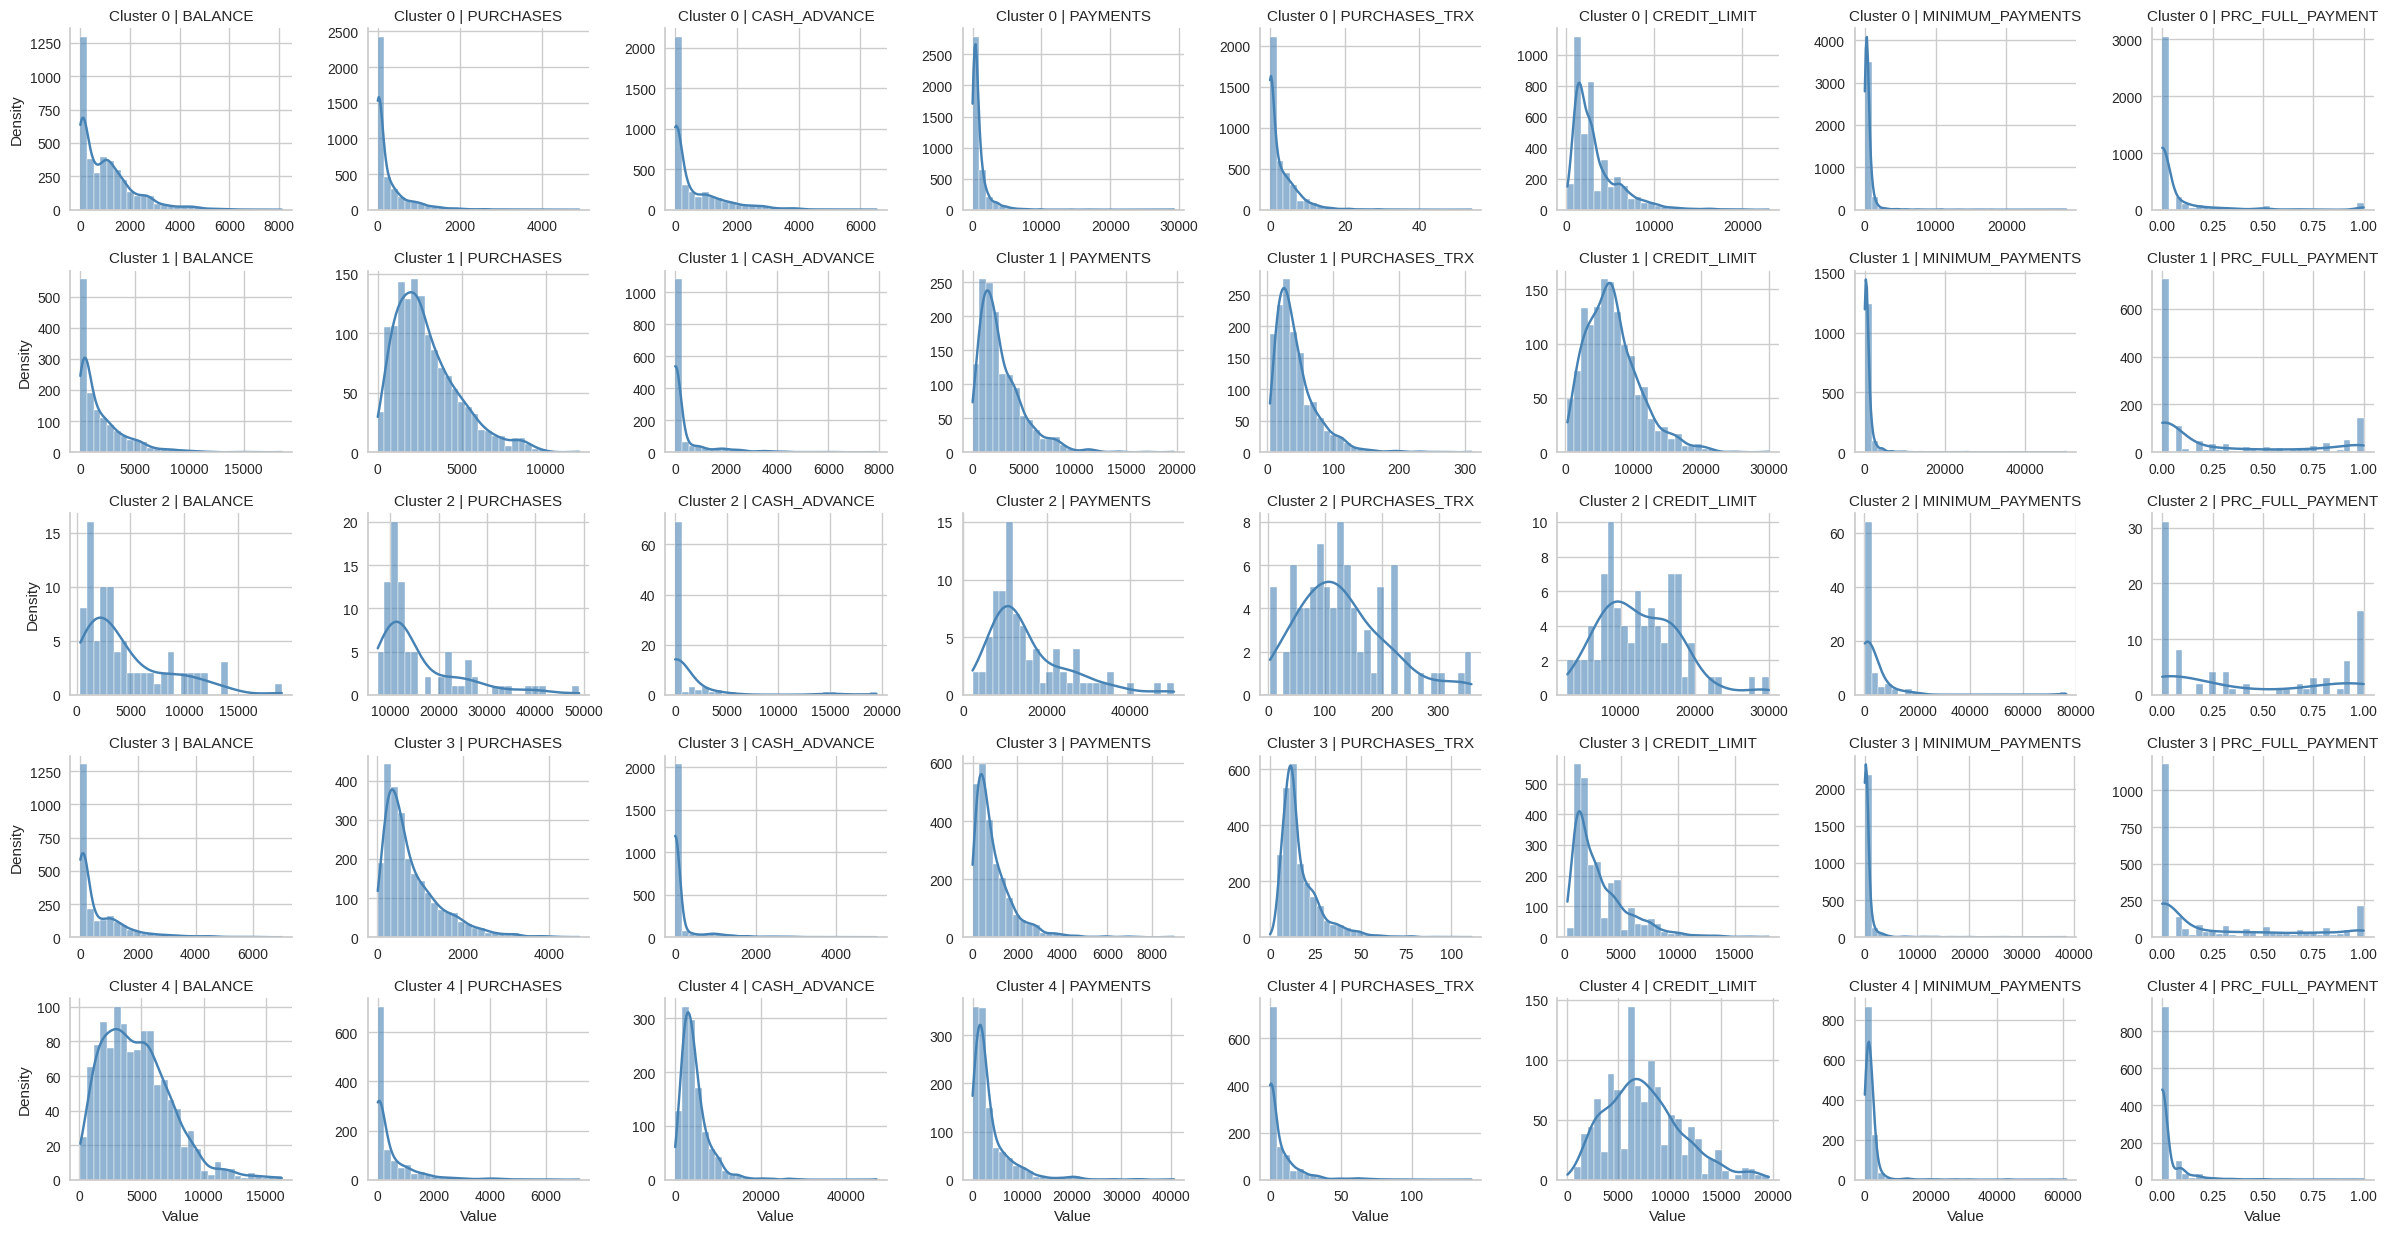

In [41]:
# ==========================================
# FacetGrid: Separate Feature Distributions per Cluster
# ==========================================
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Choose key numeric features for analysis
features = [
    'BALANCE','PURCHASES','CASH_ADVANCE','PAYMENTS',
    'PURCHASES_TRX','CREDIT_LIMIT','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'
]

# Melt dataset (long form)
long_df = cluster_df.melt(
    id_vars='Cluster',
    value_vars=features,
    var_name='Feature',
    value_name='Value'
)

# Plot each cluster on its own row
g = sns.FacetGrid(
    long_df, row='Cluster', col='Feature',
    sharex=False, sharey=False, height=2.5, aspect=1.2, palette='Set2'
)
g.map_dataframe(sns.histplot, x='Value', bins=30, color='steelblue', kde=True, alpha=0.6)

g.set_titles(row_template='Cluster {row_name}', col_template='{col_name}')
g.set_axis_labels('Value', 'Density')
plt.tight_layout()
plt.show()

###SAVING THE CLUSTERING MODEL

In [44]:
# ==========================================
# Save Model and Clustered Data
# ==========================================
import joblib
import pandas as pd

# 1) Save the trained KMeans model
joblib.dump(kmeans_model, 'kmeans_model.pkl')
print("K-Means model saved as 'kmeans_model.pkl'")

# 2) Save the scaler (important for future predictions)
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

# 3) Save the clustered dataset to CSV
cluster_df.to_csv('clustered_customers_data.csv', index=False)
print("Clustered data saved as 'clustered_customers_data.csv'")

# Optional: save PCA object too (if used)
joblib.dump(pca, 'pca_model.pkl')
print("PCA model saved as 'pca_model.pkl'")

K-Means model saved as 'kmeans_model.pkl'
Scaler saved as 'scaler.pkl'
Clustered data saved as 'clustered_customers_data.csv'
PCA model saved as 'pca_model.pkl'


Now that our unsupervised model is saved and the new customer data with the cluster labels is saved, we will train a decision tree model and test it on this data to see how accurate our model is working. This is a typical case of testing how well our k means clustering model was constructed

### DECISION TREE MODEL ON K-MEANS CLUSTERED CUSTOMER DATA

In [46]:
# ==========================================
# Train-Test Split for Decision Model
# ==========================================
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the saved clustered dataset
df_model = pd.read_csv('clustered_customers_data.csv')

# Separate features and target
X = df_model.drop(columns=['Cluster'])
y = df_model['Cluster']

# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y    # preserves cluster proportions
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

print("\nTraining target distribution:")
print(y_train.value_counts(normalize=True).round(3))

Training set shape: (6265, 17)
Test set shape: (2685, 17)

Training target distribution:
Cluster
0    0.437
3    0.270
1    0.155
4    0.129
2    0.009
Name: proportion, dtype: float64


Training and Testing the Decision Tree Model

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train decision tree with entropy criterion
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

# Quick evaluation
y_pred = dt_model.predict(X_test)
print("Test accuracy:", round(accuracy_score(y_test, y_pred), 3))

Test accuracy: 0.918


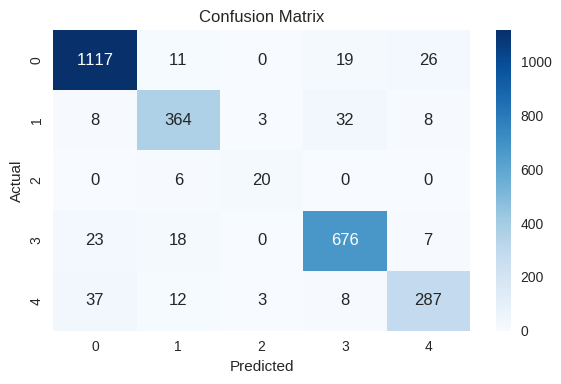

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1173
           1       0.89      0.88      0.88       415
           2       0.77      0.77      0.77        26
           3       0.92      0.93      0.93       724
           4       0.88      0.83      0.85       347

    accuracy                           0.92      2685
   macro avg       0.88      0.87      0.88      2685
weighted avg       0.92      0.92      0.92      2685



In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Based on the confusion matrix, we can see the decision tree model has great precision and recall for most of the clusters

In [50]:
# ==========================================
# Save Decision Tree Model
# ==========================================
import pickle

filename = 'decision_tree_model.sav'
pickle.dump(dt_model, open(filename, 'wb'))

print("Model saved as:", filename)

Model saved as: decision_tree_model.sav


In [51]:
# ==========================================
# Load Decision Tree Model and Test
# ==========================================
loaded_model = pickle.load(open('decision_tree_model.sav', 'rb'))

result = loaded_model.score(X_test, y_test)
print("Loaded model accuracy:", result)

Loaded model accuracy: 0.9176908752327747


We have now saved the decision tree model and we will deploy it on streamlit app to test it as if it is being used in real life by a marketing team that is testing it out on a new batch of customers